In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define dtype mapping for efficient loading
dtype_map = {
    'timestamp': 'object',  # Will convert to datetime after loading
    'temp': 'float32',
    'humid': 'float32',
    'co2': 'float32',
    'light': 'float32',
    'class': 'category',
    'trip_id': 'category',
    'fruit_cate': 'category',
    'latitude': 'float32',
    'longitude': 'float32',
    'Route': 'category',
    'temperature_C': 'float32',
    'humidity_%': 'float32',
    'dew_point_C': 'float32',
    'pressure_hPa': 'float32',
    'wind_speed_kmh': 'float32',
    'precipitation_mm': 'float32',
    'trip_id_raw': 'float32',
    'expected_delay_min': 'int16',  # Unlikely to exceed 32767 minutes
    'weight': 'float32',
    'unit_quantity': 'int16',
    'is_timestamp_dup': 'bool'
}

# Load with optimized dtypes
df = pd.read_csv('merged_timeseries_cleaned_total.csv', dtype=dtype_map)

# Convert timestamp after loading
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Memory usage after optimized loading: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df.info(memory_usage='deep')

Memory usage after optimized loading: 3048.97 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43184857 entries, 0 to 43184856
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   temp                float32       
 2   humid               float32       
 3   co2                 float32       
 4   light               float32       
 5   class               category      
 6   trip_id             category      
 7   fruit_cate          category      
 8   latitude            float32       
 9   longitude           float32       
 10  Route               category      
 11  temperature_C       float32       
 12  humidity_%          float32       
 13  dew_point_C         float32       
 14  pressure_hPa        float32       
 15  wind_speed_kmh      float32       
 16  precipitation_mm    float32       
 17  trip_id_raw         float32       
 18  expected_delay_min  int16      

In [3]:
df['trip_id'].nunique()

14677

In [4]:
df["class"].value_counts()

class
Good    39029896
Bad      4154961
Name: count, dtype: int64

In [3]:
df.head()

,timestamp,temp,humid,co2,light,class,trip_id,fruit_cate,latitude,longitude,...,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmh,precipitation_mm,trip_id_raw,expected_delay_min,weight,unit_quantity,is_timestamp_dup
0,2024-02-01 22:25:52,24.944977,89.257713,350.970184,20.473862,Good,TRIP_00030,Banana,10.74535,106.704651,...,89.0,22.0,1012.299988,8.4,0.0,1.447257e+09,7,112.599998,1044,False
1,2024-02-01 22:35:52,24.930126,88.937927,351.754242,17.989037,Good,TRIP_00030,Banana,10.74535,106.704651,...,89.0,22.0,1012.299988,8.4,0.0,1.447257e+09,7,112.599998,1044,False
2,2024-02-01 22:45:52,25.082836,88.535408,352.571625,20.079832,Good,TRIP_00030,Banana,10.74535,106.704651,...,89.0,22.0,1012.299988,8.4,0.0,1.447257e+09,7,112.599998,1044,False
3,2024-02-01 22:55:52,25.067486,88.786102,353.393188,19.468184,Good,TRIP_00030,Banana,10.74535,106.704651,...,89.0,22.0,1012.299988,8.4,0.0,1.447257e+09,7,112.599998,1044,False
4,2024-02-01 23:05:52,25.109032,88.616013,354.223053,20.142464,Good,TRIP_00030,Banana,10.74535,106.704651,...,89.0,22.0,1012.299988,8.4,0.0,1.447257e+09,7,112.599998,1044,False


In [4]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
timestamp             0
temp                  0
humid                 0
co2                   0
light                 0
class                 0
trip_id               0
fruit_cate            0
latitude              0
longitude             0
Route                 0
temperature_C         0
humidity_%            0
dew_point_C           0
pressure_hPa          0
wind_speed_kmh        0
precipitation_mm      0
trip_id_raw           0
expected_delay_min    0
weight                0
unit_quantity         0
is_timestamp_dup      0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11848\2349522423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fruit_by_trip = df.groupby('trip_id')['fruit_cate'].first().value_counts().sort_values(ascending=False)


Fruit Category Distribution (by unique trips):
fruit_cate
Tomato       3725
Banana       3705
Orange       3677
Pineapple    3570
Name: count, dtype: int64

Total unique trips: 14677
Total unique fruit categories: 4


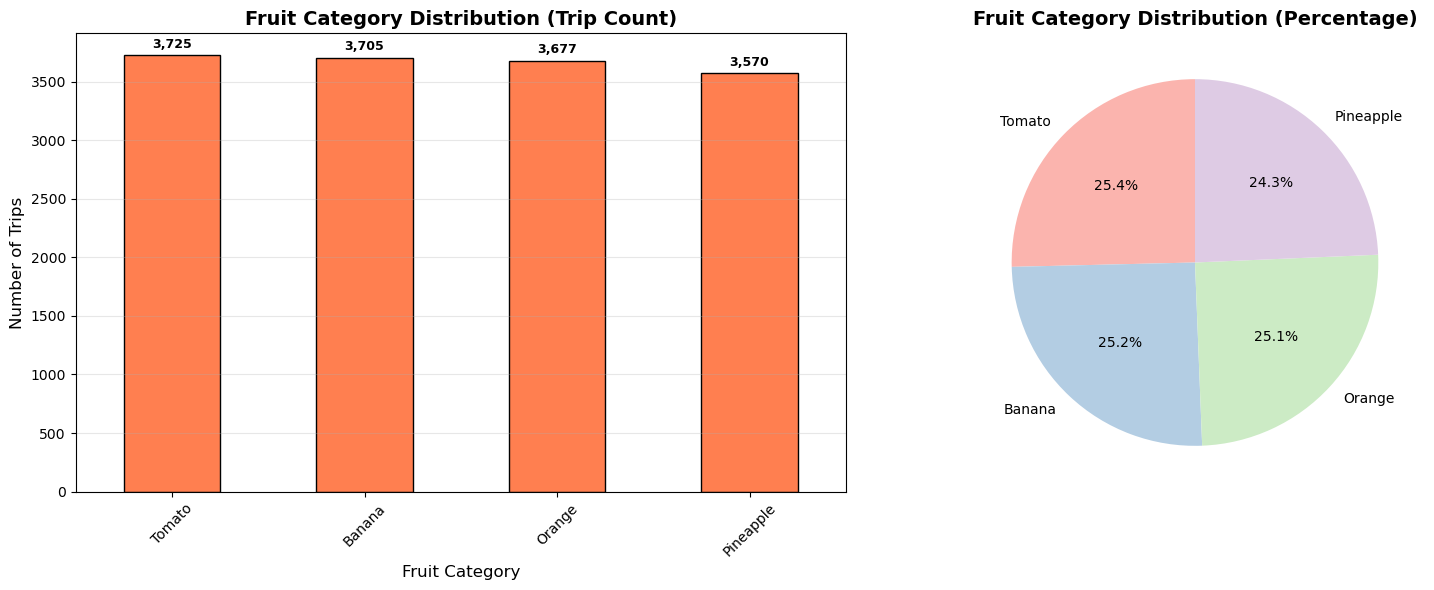


Percentage distribution by trips:
fruit_cate
Tomato       25.38
Banana       25.24
Orange       25.05
Pineapple    24.32
Name: count, dtype: float64

Fruit category distribution by records:
fruit_cate
Tomato       11022053
Banana       10854753
Orange       10659965
Pineapple    10648086
Name: count, dtype: int64

Percentage by records:
fruit_cate
Tomato       25.52
Banana       25.14
Orange       24.68
Pineapple    24.66
Name: count, dtype: float64


In [7]:
# Distribution of fruit_cate by unique trips
fruit_by_trip = df.groupby('trip_id')['fruit_cate'].first().value_counts().sort_values(ascending=False)

print("Fruit Category Distribution (by unique trips):")
print(fruit_by_trip)
print(f"\nTotal unique trips: {len(df['trip_id'].unique())}")
print(f"Total unique fruit categories: {fruit_by_trip.nunique()}")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
fruit_by_trip.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Fruit Category Distribution (Trip Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fruit Category', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(fruit_by_trip):
    axes[0].text(i, v + max(fruit_by_trip)*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Pie chart
colors = plt.cm.Pastel1(range(len(fruit_by_trip)))
axes[1].pie(fruit_by_trip, labels=fruit_by_trip.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[1].set_title('Fruit Category Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Percentage distribution
print("\nPercentage distribution by trips:")
print((fruit_by_trip / len(df['trip_id'].unique()) * 100).round(2))

# Additional: Record count by fruit category
fruit_records = df['fruit_cate'].value_counts().sort_values(ascending=False)
print(f"\nFruit category distribution by records:")
print(fruit_records)
print(f"\nPercentage by records:")
print((fruit_records / len(df) * 100).round(2))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11848\3149005781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_counts = df.groupby('trip_id')['Route'].first().value_counts().sort_values(ascending=False)


Route Distribution:
Route
VNSGN-KRPUS    2484
VNSGN-KRINC    2118
VNSGN-CNSHA    1923
VNSGN-USCHI    1645
VNSGN-USMIA    1633
VNHPH-CNSHA    1445
VNHPH-CNQZH    1390
VNHPH-USMIA    1243
VNDAD-KRPUS     796
Name: count, dtype: int64

Total unique routes: 9
Total records: 43184857


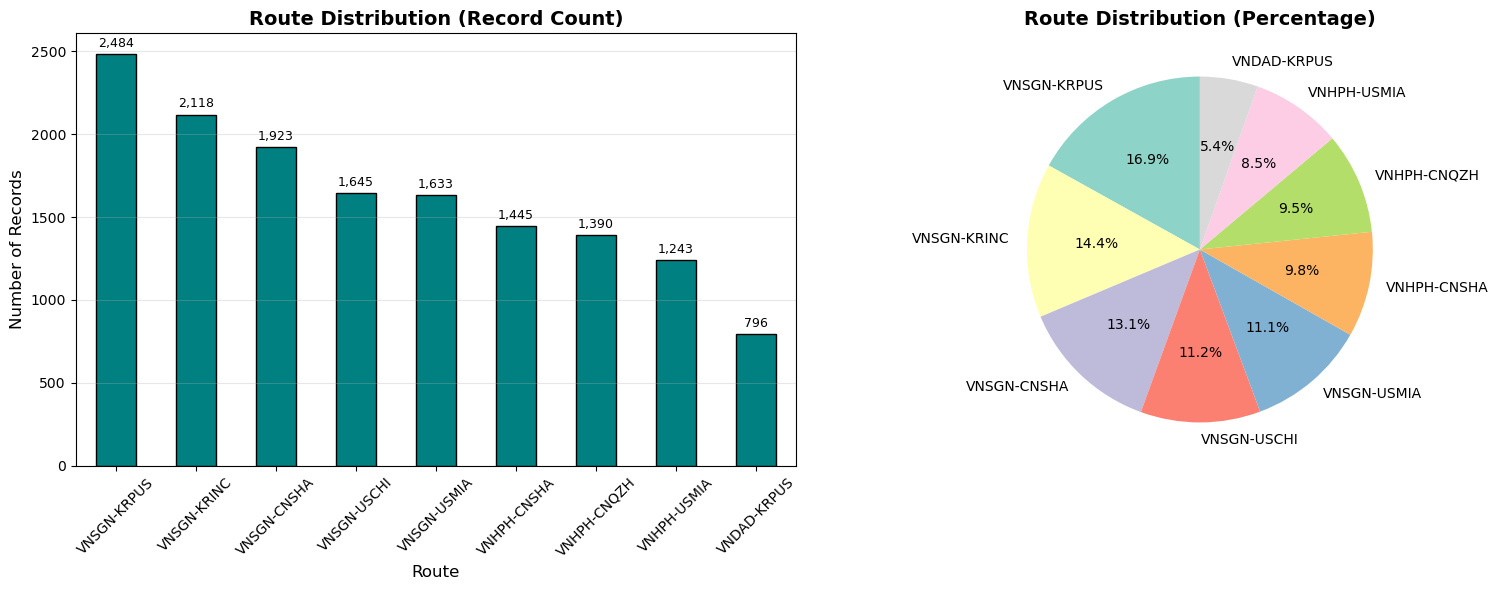


Percentage distribution:
Route
VNSGN-KRPUS    0.01
VNSGN-KRINC    0.00
VNSGN-CNSHA    0.00
VNSGN-USCHI    0.00
VNSGN-USMIA    0.00
VNHPH-CNSHA    0.00
VNHPH-CNQZH    0.00
VNHPH-USMIA    0.00
VNDAD-KRPUS    0.00
Name: count, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11848\3149005781.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_by_trip = df.groupby('trip_id')['Route'].first().value_counts()



Route distribution by unique trips:
Route
VNSGN-KRPUS    2484
VNSGN-KRINC    2118
VNSGN-CNSHA    1923
VNSGN-USCHI    1645
VNSGN-USMIA    1633
VNHPH-CNSHA    1445
VNHPH-CNQZH    1390
VNHPH-USMIA    1243
VNDAD-KRPUS     796
Name: count, dtype: int64
Percentage by trips:
Route
VNSGN-KRPUS    16.92
VNSGN-KRINC    14.43
VNSGN-CNSHA    13.10
VNSGN-USCHI    11.21
VNSGN-USMIA    11.13
VNHPH-CNSHA     9.85
VNHPH-CNQZH     9.47
VNHPH-USMIA     8.47
VNDAD-KRPUS     5.42
Name: count, dtype: float64


In [8]:
# Distribution of Route
route_counts = df.groupby('trip_id')['Route'].first().value_counts().sort_values(ascending=False)

print("Route Distribution:")
print(route_counts)
print(f"\nTotal unique routes: {df['Route'].nunique()}")
print(f"Total records: {len(df)}")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
route_counts.plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_title('Route Distribution (Record Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Route', fontsize=12)
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(route_counts):
    axes[0].text(i, v + max(route_counts)*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Pie chart
colors = plt.cm.Set3(range(len(route_counts)))
axes[1].pie(route_counts, labels=route_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[1].set_title('Route Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Percentage distribution
print("\nPercentage distribution:")
print((route_counts / len(df) * 100).round(2))

# Route statistics by trip
route_by_trip = df.groupby('trip_id')['Route'].first().value_counts()
print(f"\nRoute distribution by unique trips:")
print(route_by_trip)
print(f"Percentage by trips:")
print((route_by_trip / len(df['trip_id'].unique()) * 100).round(2))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11536\2075181890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_weight_quantity = df.groupby('trip_id').agg({


Summary statistics:
             weight  unit_quantity
count  14677.000000   14677.000000
mean      16.127941    1168.329291
std       46.057323    4049.236711
min        0.000000  -32301.000000
25%        1.525226     326.000000
50%        4.580000     431.000000
75%       13.452398     906.000000
max      946.500000   32762.000000


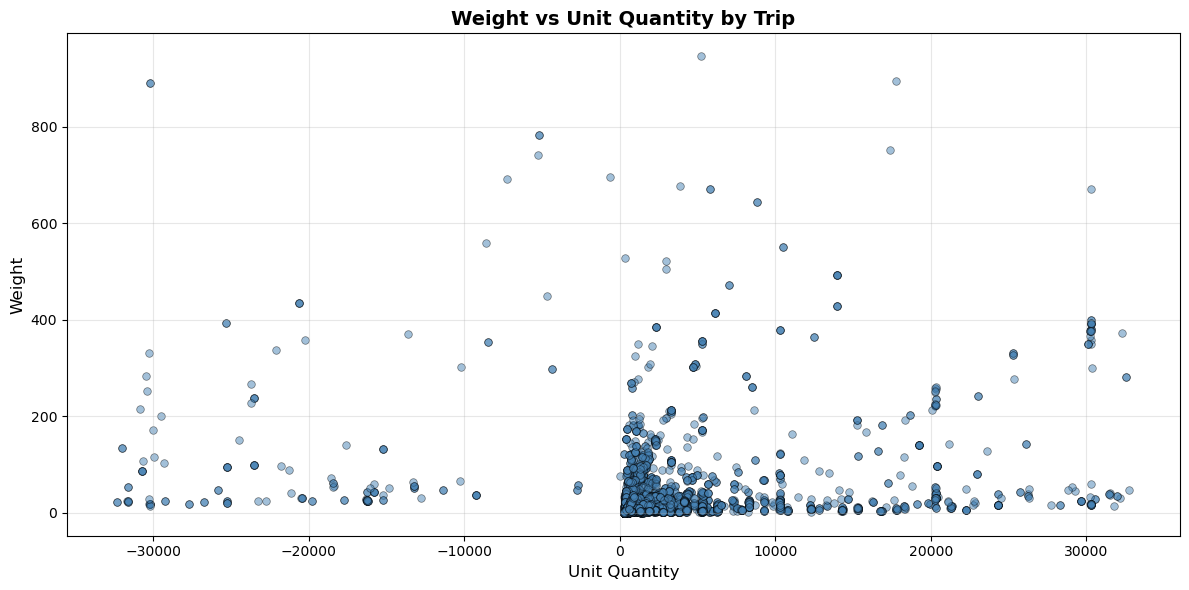

In [3]:
# Aggregate weight and unit_quantity by trip_id
trip_weight_quantity = df.groupby('trip_id').agg({
    'weight': 'first',  # or 'mean' if weight varies within trip
    'unit_quantity': 'first'  # or 'sum' depending on your data
}).reset_index()

print(f"Summary statistics:")
print(trip_weight_quantity[['weight', 'unit_quantity']].describe())

# 1. Scatter plot - Weight vs Unit Quantity
plt.figure(figsize=(12, 6))
plt.scatter(trip_weight_quantity['unit_quantity'], trip_weight_quantity['weight'], 
            alpha=0.5, s=30, c='steelblue', edgecolors='black', linewidth=0.5)
plt.xlabel('Unit Quantity', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title('Weight vs Unit Quantity by Trip', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

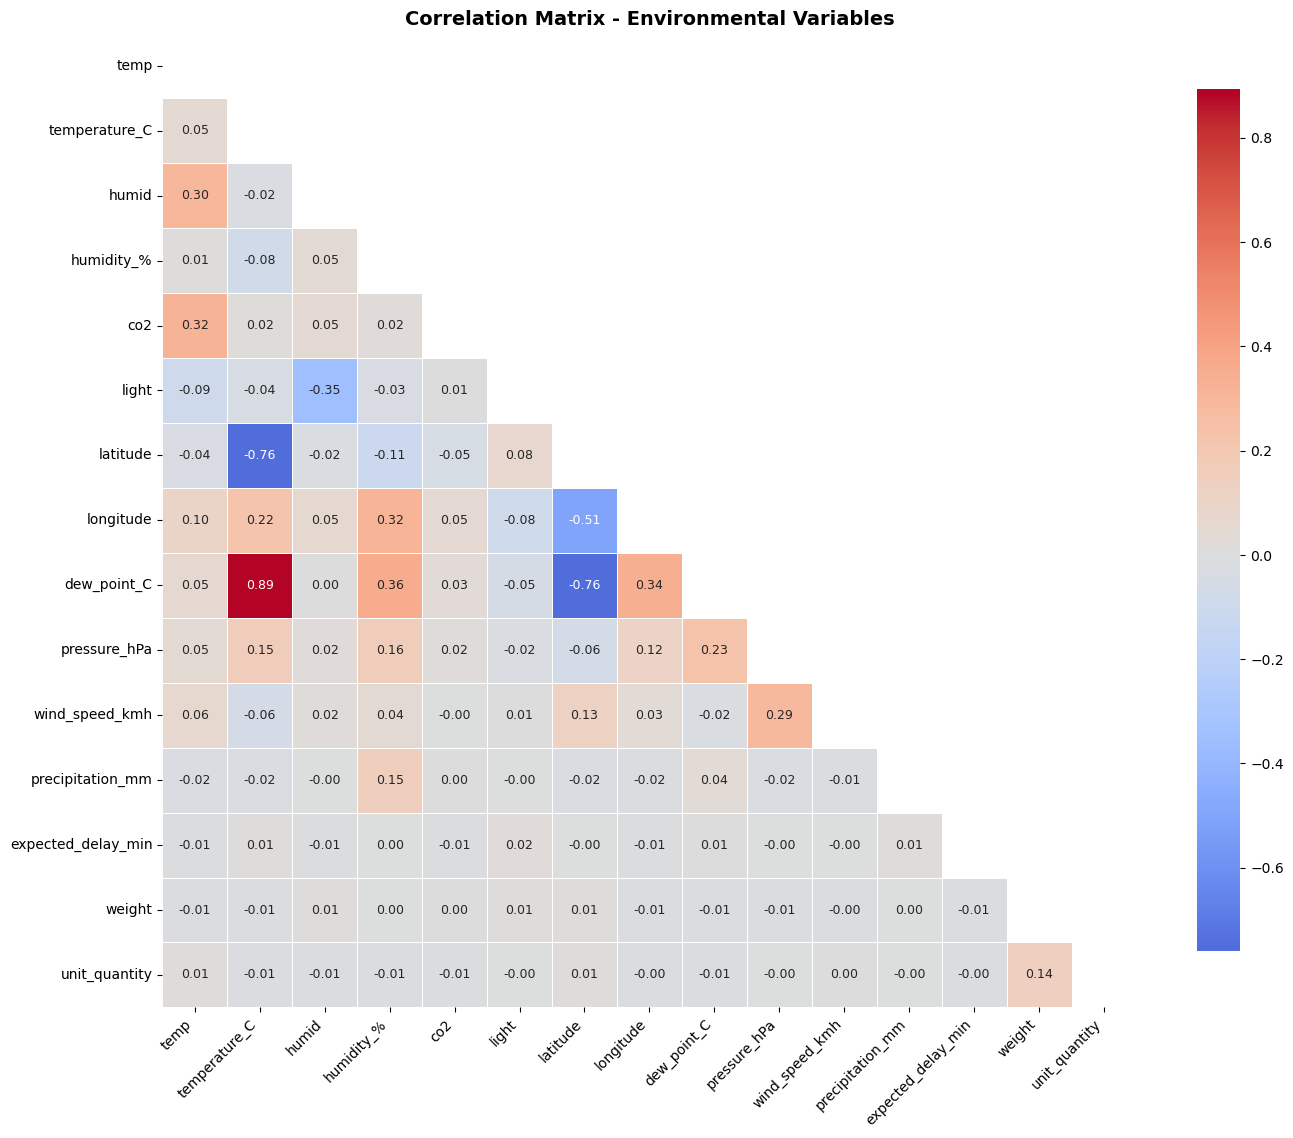


High Correlations (|r| > 0.7):
temperature_C <-> latitude: -0.759
temperature_C <-> dew_point_C: 0.893
latitude <-> dew_point_C: -0.760


In [5]:
# Correlation matrix - fixed column names
corr_matrix = df[['temp', 'temperature_C', 'humid', 'humidity_%', 'co2', 'light', 
                   'latitude', 'longitude', 'dew_point_C', 'pressure_hPa', 
                   'wind_speed_kmh', 'precipitation_mm', 'expected_delay_min',
                   'weight', 'unit_quantity']].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, 
            annot_kws={'fontsize': 9})
plt.title('Correlation Matrix - Environmental Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print high correlations (absolute value > 0.7, excluding diagonal)
print("\nHigh Correlations (|r| > 0.7):")
high_corr = corr_matrix.abs() > 0.7
high_corr = high_corr & ~np.eye(len(corr_matrix), dtype=bool)
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if high_corr.iloc[i, j]:
            print(f"{corr_matrix.index[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")